In [3]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 86.7 MB/s eta 0:00:00


In [4]:
from pulp import LpVariable, LpProblem, LpMaximize, value

# Create a LP problem
prob = LpProblem("Product Mix Problem", LpMaximize)

# Define variables
x = LpVariable("Product A", 0, None)  # x >= 0
y = LpVariable("Product B", 0, None)  # y >= 0

# Define objective function
prob += 40 * x + 50 * y, "Total Profit"

# Define constraints
prob += 2 * x + y <= 100, "Constraint 1"
prob += 3 * x + 2 * y <= 120, "Constraint 2"

# Solve the problem
prob.solve()

# Get the optimal values
x_optimal = x.varValue
y_optimal = y.varValue

print(f"Optimal units of Product A: {x_optimal}")
print(f"Optimal units of Product B: {y_optimal}")
print(f"Maximum Profit: {value(prob.objective)}")

Optimal units of Product A: 0.0
Optimal units of Product B: 60.0
Maximum Profit: 3000.0


/usr/local/lib/python3.11/dist-packages/pulp/pulp.py:1455: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


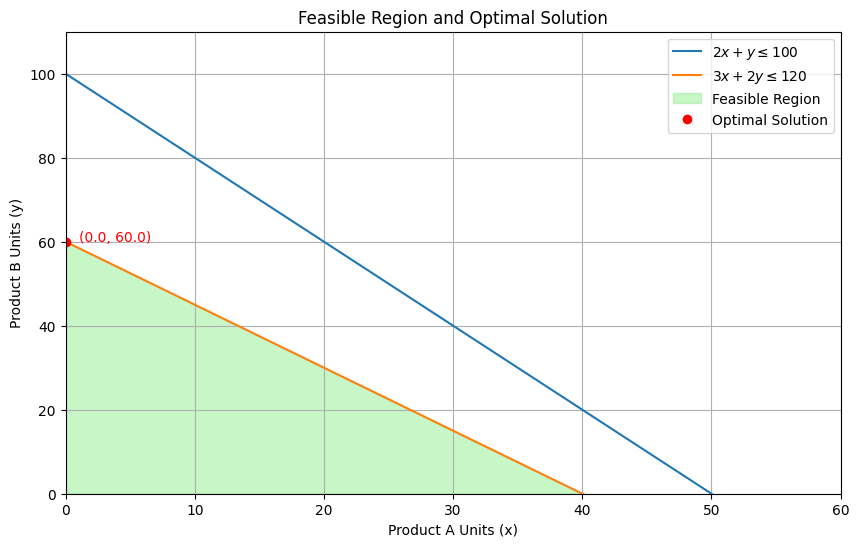

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Create grid for x and y
x_vals = np.linspace(0, 60, 400)
y1 = 100 - 2 * x_vals        # From 2x + y <= 100 → y <= 100 - 2x
y2 = (120 - 3 * x_vals) / 2  # From 3x + 2y <= 120 → y <= (120 - 3x)/2

# Plot constraints
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y1, label=r'$2x + y \leq 100$')
plt.plot(x_vals, y2, label=r'$3x + 2y \leq 120$')

# Fill feasible region
y3 = np.minimum(y1, y2)
plt.fill_between(x_vals, 0, y3, where=(y3 >= 0), color='lightgreen', alpha=0.5, label='Feasible Region')

# Plot optimal point
plt.plot(x_optimal, y_optimal, 'ro', label='Optimal Solution')
plt.text(x_optimal + 1, y_optimal, f'({x_optimal:.1f}, {y_optimal:.1f})', color='red')

# Labels and legend
plt.xlim(0, max(x_vals))
plt.ylim(0, max(y1.max(), y2.max()) + 10)
plt.xlabel('Product A Units (x)')
plt.ylabel('Product B Units (y)')
plt.title('Feasible Region and Optimal Solution')
plt.grid(True)
plt.legend()
plt.show()